In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import tensorflow as tf

In [2]:
dataset = pd.read_csv("drug200.csv")

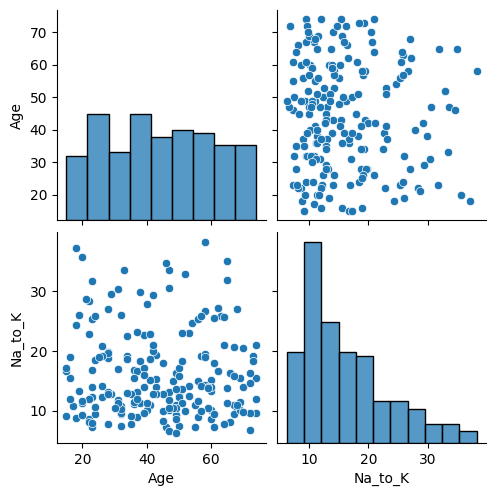

In [3]:
sb.pairplot(dataset)

In [4]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dataset[dataset.columns[5]]=lb.fit_transform(dataset.iloc[ : , 5])

In [5]:
X = dataset.iloc[ : , : -1]
Y = dataset.iloc[ : , 5]

In [6]:
oneshot_col = ["Sex", "BP", "Cholesterol"]
normalised_col = pd.get_dummies(X, columns = oneshot_col)
X = X.drop(oneshot_col, axis = 1)
X = pd.concat([X, normalised_col], axis = 1)
X = X.loc[:,~X.columns.duplicated()]# Remove duplicate columns

In [7]:
from sklearn.preprocessing import MinMaxScaler
mmScaler = MinMaxScaler()
#astype = async type
X = mmScaler.fit_transform(X.astype(float))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [9]:
#imports for neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [10]:
#building the network
model = Sequential()
model.add(Dense(30, activation = "relu"))
model.add(Dense(30, activation = "relu"))
model.add(Dense(30, activation = "relu"))
model.add(Dense(5, activation = tf.nn.softmax))

In [11]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy')

In [12]:
model.fit(x = X_train, y = y_train.values, epochs = 300)

Epoch 1/300
6/6 [==============================] - 2s 7ms/step - loss: 1.6705
Epoch 2/300
6/6 [==============================] - 0s 5ms/step - loss: 1.6116
Epoch 3/300
6/6 [==============================] - 0s 5ms/step - loss: 1.5679
Epoch 4/300
6/6 [==============================] - 0s 4ms/step - loss: 1.5310
Epoch 5/300
6/6 [==============================] - 0s 4ms/step - loss: 1.4982
Epoch 6/300
6/6 [==============================] - 0s 4ms/step - loss: 1.4594
Epoch 7/300
6/6 [==============================] - 0s 4ms/step - loss: 1.4193
Epoch 8/300
6/6 [==============================] - 0s 4ms/step - loss: 1.3721
Epoch 9/300
6/6 [==============================] - 0s 4ms/step - loss: 1.3232
Epoch 10/300
6/6 [==============================] - 0s 4ms/step - loss: 1.2794
Epoch 11/300
6/6 [==============================] - 0s 5ms/step - loss: 1.2418
Epoch 12/300
6/6 [==============================] - 0s 5ms/step - loss: 1.2011
Epoch 13/300
6/6 [==============================] - 0s 6ms/st

In [13]:
predictions = model.predict(X_test)
predictions

1/1 [==============================] - 0s 113ms/step


array([[2.16105818e-08, 7.06364028e-03, 1.42365934e-07, 9.92900252e-01,
        3.59355035e-05],
       [1.21638391e-06, 7.22733589e-08, 7.67546517e-05, 2.17352567e-06,
        9.99919713e-01],
       [9.99999583e-01, 1.27073942e-11, 2.02898653e-11, 3.61600144e-07,
        6.43967128e-12],
       [9.99999940e-01, 2.49808959e-17, 5.03042073e-18, 6.09731011e-19,
        1.41976409e-22],
       [9.99999106e-01, 4.47896192e-10, 3.23062288e-08, 6.98671556e-08,
        7.13085512e-07],
       [1.91739946e-05, 9.59514637e-07, 4.57963188e-06, 2.51074322e-03,
        9.97464478e-01],
       [3.65160246e-12, 3.47800523e-07, 3.80463871e-06, 9.77347895e-07,
        9.99994814e-01],
       [2.20647939e-06, 2.59697099e-08, 4.43525460e-06, 1.14979506e-04,
        9.99878228e-01],
       [8.12292457e-01, 6.63279081e-07, 5.90925367e-07, 1.87704757e-01,
        1.56854264e-06],
       [2.47454574e-12, 1.22540852e-10, 1.97976351e-06, 1.82435303e-10,
        9.99997914e-01],
       [2.10932285e-08, 9.9999

In [14]:
y_test

18     3
170    4
107    0
98     0
177    0
182    4
5      4
146    4
12     0
152    4
61     1
125    0
180    0
154    0
80     2
7      3
33     0
130    0
37     4
74     0
Name: Drug, dtype: int64

In [15]:
predictionList = []

for i in range(0, len(X_test)):
  predictionList.append(np.argmax(predictions[i]))

In [16]:
from pandas import DataFrame
predictionsFrame = DataFrame(predictionList)

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, predictionsFrame))
print(confusion_matrix(y_test, predictionsFrame))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[10  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  6]]


In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       0.67      1.00      0.80         2
           4       0.75      1.00      0.86         6

    accuracy                           0.80        20
   macro avg       0.78      0.92      0.81        20
weighted avg       0.87      0.80      0.80        20

[[6 1 0 1 2]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 6]]


In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[10  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  6]]
